In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("Admission_Predict.csv")
df.drop(['Serial No.'],axis=1,inplace=True)
col_names=df.columns.tolist()
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [3]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)
xs = MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])

<ipython-input-4-1d52d9e5a558>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
c:\users\anoop purohith\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-4-1d52d9e5a558>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [5]:
cy_train=[1 if chance > 0.83 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.83 else 0 for chance in y_test]
cy_test=np.array(cy_test)

In [6]:
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.63077021, 0.21282338])

In [7]:
lr = LinearRegression()
lr.fit(x_train, cy_train)

score = accuracy_score(lr.predict(x_test).round(), cy_test, normalize=False)
print("Accuracy Acheived= ", score,"%!")
print(classification_report(cy_test, lr.predict(x_test).round()))

Accuracy Acheived=  96 %!
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        80
           1       0.90      0.90      0.90        20

    accuracy                           0.96       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.96      0.96      0.96       100



Text(0.5, 0, 'Chance of admit')

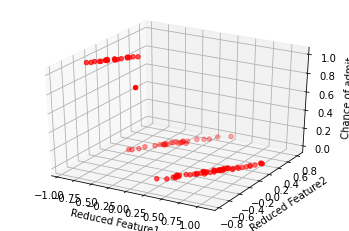

In [11]:
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_test[:,0],x_test[:,1],cy_test,c = 'red')
#ax.plot3D(x_test[:,0],x_test[:,1],lr.predict(x_test),c = 'blue')
ax.set_xlabel('Reduced Feature1')
ax.set_ylabel('Reduced Feature2')
ax.set_zlabel('Chance of admit')

Text(0, 0.5, 'Chance of admit')

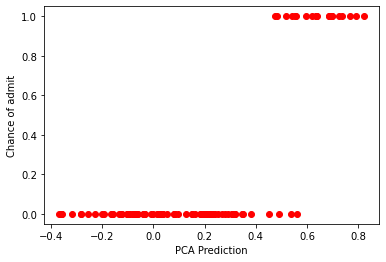

In [12]:
plt.scatter(lr.predict(x_test),cy_test,color='red');
#plt.plot(pred,y_test,color='blue')
plt.xlabel('PCA Prediction')
plt.ylabel('Chance of admit')

In [13]:
test_set_sme = mean_squared_error(cy_test, lr.predict(x_test).round())
test_set_rmse = np.sqrt(test_set_sme)
test_set_r2 = r2_score(cy_test, lr.predict(x_test).round())
print("Squared Mean Error= ", test_set_sme)
print("Root Squared Mean Error= ", test_set_rmse)
print("Coefficient of Determination= ", test_set_r2)

Squared Mean Error=  0.04
Root Squared Mean Error=  0.2
Coefficient of Determination=  0.75
